In [103]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from adjustText import adjust_text
import re

/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


In [104]:
#model information (number of parameters and state variables)
n_parameter={"Borghans_BiophysChem1997":24,
                  "Palani2011":15,
                  "Sneyd_PNAS2002":16,
                  "Kinetic_glycolysis_assay_model":13,
                  "Fujita_SciSignal2010":26,
                  "Messiha2013":192,
                  "Raia_CancerResearch":45,
                  "Weber_BMC2015":53,
                  "Crauste_CellSystems2017":16,
                  "Fiedler_BMC2016":24,
                  "Smallbone2013_SerineBiosynthesis":10,
                  "Bruno_JExpBio2016":10,
                  "Becker_Science2010":17,
                  "Ray2013":20,
                  "Chassagnole2002":117,
                  "Bertozzi2020":36,
                  "Schwen_PONE2014":19,
                  "Garde2020":6,
                  "Smallbone2011_TrehaloseBiosynthesis":52,
                  "Elowitz_Nature2000":22}

n_state_variables={"Borghans_BiophysChem1997":3,
                  "Palani2011":5,
                  "Sneyd_PNAS2002":6,
                  "Kinetic_glycolysis_assay_model":12,
                  "Fujita_SciSignal2010":26,
                  "Messiha2013":28,
                  "Raia_CancerResearch":14,
                  "Weber_BMC2015":7,
                  "Crauste_CellSystems2017":5,
                  "Fiedler_BMC2016":6,
                  "Smallbone2013_SerineBiosynthesis":2,
                  "Bruno_JExpBio2016":6,
                  "Becker_Science2010":6,
                  "Ray2013":6,
                  "Chassagnole2002":36,
                  "Bertozzi2020":3,
                  "Schwen_PONE2014":11,
                  "Garde2020":6,
                  "Smallbone2011_TrehaloseBiosynthesis":6,
                  "Elowitz_Nature2000":8}

literature_names={"Borghans_BiophysChem1997":'Borghans et. al (1997)',
                  "Palani2011":'Palani et. al (2011)',
                  "Sneyd_PNAS2002":'Sneyd et. al (2002)',
                  "Kinetic_glycolysis_assay_model":'Nitin et. al (2013)',
                  "Fujita_SciSignal2010":'Fujita et. al (2010)',
                  "Messiha2013":'Messiha et. al (2014)',
                  "Raia_CancerResearch":'Raia et. al (2011)',
                  "Weber_BMC2015":'Weber et. al (2015)',
                  "Crauste_CellSystems2017":'Crauste et. al (2017)',
                  "Fiedler_BMC2016":'Fiedler et. al (2016)',
                  "Smallbone2013_SerineBiosynthesis":'Smallbone et. al (2013)',
                  "Bruno_JExpBio2016":'Bruno et. al (2016)',
                  "Becker_Science2010":'Becker et. al (2010)',
                  "Ray2013":'Ray et. al (2013)',
                  "Chassagnole2002":'Chassagnole et. al (2002)',
                  "Bertozzi2020":'Bertozzi et. al (2020)',
                  "Schwen_PONE2014":'Schwen et. al (2015)',
                  "Garde2020":'Garde et. al (2020)',
                  "Smallbone2011_TrehaloseBiosynthesis":'Smallbone et. al (2011)',
                  "Elowitz_Nature2000":'Elowitz et. al (2000)'}




In [105]:
def retrieve_convergence_results(results_dir,file_list):
    # file_list

    loss_dfs={}
    params_dfs={}
    norms_dfs={}
    for file in file_list:
        if "losses" in file:
            loss_data=pd.read_csv(results_dir+file,index_col=0)
            loss_dfs[file]=loss_data
        if "parameters" in file:
            params_data=pd.read_csv(results_dir+file,index_col=0)
            params_dfs[file]=params_data
        if "norms" in file:
            norms_data=pd.read_csv(results_dir+file,index_col=0)
            norms_dfs[file]=norms_data
    return loss_dfs,params_dfs,norms_dfs

def retrieve_success_rate(loss_dfs,model_name):
    """retrieve initializatoin success from loss_dfs"""


    initialization_succes_dict={}
    lb001=[]
    lb01=[]
    lb05=[]
    lb09=[]
    for bound in list(loss_dfs.keys()):
        run=re.search("run_\\d",bound).group()

        if re.search("lb0.01",bound):
            lb=re.search('lb0.01',bound).group()
            loss_df=loss_dfs[bound]
            percentage_succeeded_initializations=len(np.where(loss_df.iloc[0,:]!=-1)[0])/np.shape(loss_df)[1]*100
            lb001.append(percentage_succeeded_initializations)
        if re.search("lb0.1",bound):
            lb=re.search('lb0.1',bound).group()
            loss_df=loss_dfs[bound]
            percentage_succeeded_initializations=len(np.where(loss_df.iloc[0,:]!=-1)[0])/np.shape(loss_df)[1]*100
            lb01.append(percentage_succeeded_initializations)

        if re.search("lb0.5",bound):
            lb=re.search('lb0.5',bound).group()
            loss_df=loss_dfs[bound]
            percentage_succeeded_initializations=len(np.where(loss_df.iloc[0,:]!=-1)[0])/np.shape(loss_df)[1]*100
            lb05.append(percentage_succeeded_initializations)

        if re.search("lb0.9",bound):
            lb=re.search('lb0.9',bound).group()
            loss_df=loss_dfs[bound]
            percentage_succeeded_initializations=len(np.where(loss_df.iloc[0,:]!=-1)[0])/np.shape(loss_df)[1]*100
            lb09.append(percentage_succeeded_initializations)
    initialization_succes_dict['lb=0.01']=lb001
    initialization_succes_dict['lb=0.1']=lb01
    initialization_succes_dict['lb=0.5']=lb05    
    initialization_succes_dict['lb=0.9']=lb09
        
    return initialization_succes_dict

#### Q1.1. What is the succesfull initialization rate per model for different bounds?
We perform latin hypercube sampling between different lower and upper bounds and:
1. Compare against number of parameters
2. Compare against number of state variables 
3. Compare against initial norm

In [106]:
#results directory
model_names=os.listdir("results/initialization_experiment/")

results_dir="results/EXP1_initialization_bounds_lhs/"

model_success_dict={}
for model_name in model_names:
    results_dir="results/EXP1_initialization_bounds_lhs/"+model_name+"/"
    file_list=os.listdir(results_dir)
    loss_dfs,_,_=retrieve_convergence_results(results_dir,file_list)
    model_success_dict[model_name]=retrieve_success_rate(loss_dfs,model_name)



# Flatten the dictionary into a list of tuples
flattened_data = [
    (model, lb, idx + 1, value)  # idx + 1 to get Value_1, Value_2, etc.
    for model, lbs in model_success_dict.items()
    for lb, values in lbs.items()
    for idx, value in enumerate(values)
]

# Create the DataFrame
df_init_rate = pd.DataFrame(flattened_data, columns=['Model', 'lb', 'Value_Index', 'Value'])

# Pivot the DataFrame to have separate columns for each Value_Index
df_init_rate = df_init_rate.pivot_table(index=['Model', 'lb'], columns='Value_Index', values='Value')

# Reset the column names for better readability
df_init_rate.columns = [f'run_{int(col)}' for col in df_init_rate.columns]

# Reset the index to make 'lb' a column
df_init_rate = df_init_rate.reset_index()

df_init_rate.insert(0,"n_parameters",df_init_rate["Model"].apply(lambda x: n_parameter.get(x)))
df_init_rate.insert(0,"n_state_variables",df_init_rate["Model"].apply(lambda x: n_state_variables.get(x)))
df_init_rate.insert(0,"literature_name",df_init_rate["Model"].apply(lambda x: literature_names.get(x)))


df_init_rate['mean_success'] = df_init_rate[['run_1', 'run_2', 'run_3']].mean(axis=1)
df_init_rate['std_success'] = df_init_rate[['run_1', 'run_2', 'run_3']].std(axis=1)



<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:47: SyntaxWarning: invalid escape sequence '\l'
<>:58: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:47: SyntaxWarning: invalid escape sequence '\l'
<>:58: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_6263/3285862456.py:26: SyntaxWarning: invalid escape sequence '\l'
  axes[0,0].set_title("$0.01*\\theta_{true} \leq \\theta_{true}\leq \\theta_{true}*100$")
/tmp/ipykernel_6263/3285862456.py:36: SyntaxWarning: invalid escape sequence '\l'
  axes[0,1].set_title("$0.1*\\theta_{true} \leq \\theta_{true}\leq \\theta_{true}*10$")
/tmp/ipykernel_6263/3285862456.py:47: SyntaxWarning: invalid escape sequence '\l'
  axes[1,0].set_title("$0.5*\\theta_{true} \leq \\theta_{true}\leq \\theta_{true}*2$")
/tmp/ipykernel_6263/3285862456.py:58: SyntaxWarning: invalid escape sequence '\l'

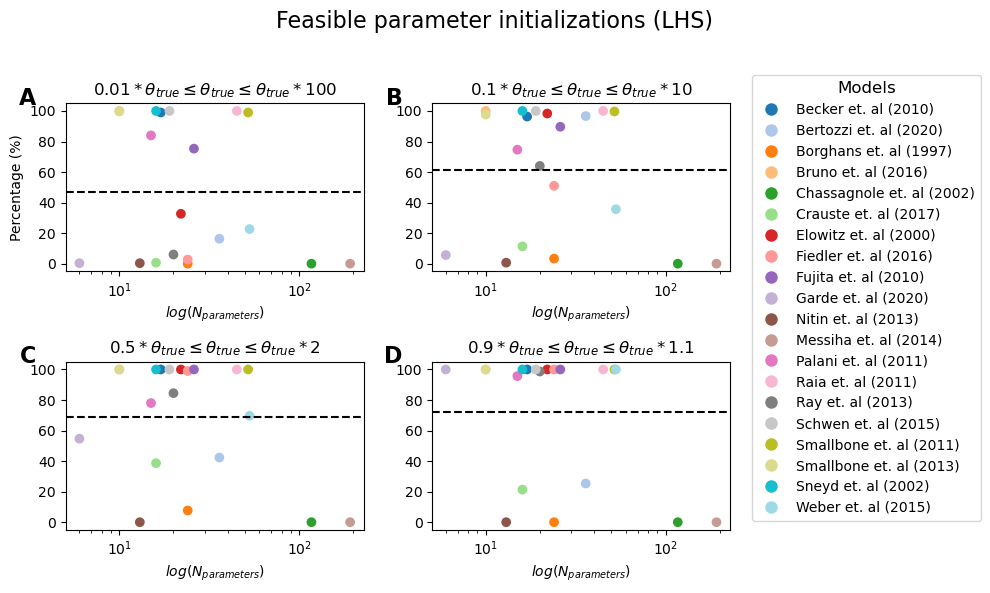

In [107]:


# Create a figure with 3 subplots arranged in 1 row and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 6))



# Plot the first scatter plot
plot_values01=df_init_rate[df_init_rate['lb']=='lb=0.01']
plot_values1=df_init_rate[df_init_rate['lb']=='lb=0.1']
plot_values5=df_init_rate[df_init_rate['lb']=='lb=0.5']
plot_values9=df_init_rate[df_init_rate['lb']=='lb=0.9']



cmap = cm.get_cmap('tab20', len(plot_values01['literature_name']))
colors = cmap(range(len(plot_values01['literature_name'])))


sc1 = axes[0,0].scatter(plot_values01['n_parameters'], plot_values01['mean_success'], 
                      color=colors)
axes[0,0].set_xlabel("$log(N_{parameters})$")
axes[0,0].set_ylabel("Percentage (%)")
axes[0,0].text(-0.1, 1.1, 'A', transform=axes[0,0].transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')
axes[0,0].axhline(plot_values01.mean_success.mean(),linestyle="--",c="black")
axes[0,0].set_xscale("log")
axes[0,0].set_title("$0.01*\\theta_{true} \leq \\theta_{true}\leq \\theta_{true}*100$") 

# Plot the second scatter plot
sc2 = axes[0,1].scatter(plot_values1['n_parameters'], plot_values1['mean_success'], 
                      color=colors)
axes[0,1].set_xlabel("$log(N_{parameters})$")
axes[0,1].text(-0.1, 1.1, 'B', transform=axes[0,1].transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')
axes[0,1].axhline(plot_values1.mean_success.mean(),linestyle="--",c="black")
axes[0,1].set_xscale("log")
axes[0,1].set_title("$0.1*\\theta_{true} \leq \\theta_{true}\leq \\theta_{true}*10$") 

# Plot the third scatter plot
sc3 = axes[1,0].scatter(plot_values5['n_parameters'],plot_values5['mean_success'], 
                      color=colors)
axes[1,0].set_xlabel("$log(N_{parameters})$")
axes[1,0].text(-0.1, 1.1, 'C', transform=axes[1,0].transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')

axes[1,0].axhline(plot_values5.mean_success.mean(),linestyle="--",c="black")
axes[1,0].set_xscale("log")
axes[1,0].set_title("$0.5*\\theta_{true} \leq \\theta_{true}\leq \\theta_{true}*2$") 


# Plot the third scatter plot
sc3 = axes[1,1].scatter(plot_values9['n_parameters'],plot_values9['mean_success'], 
                      color=colors)
axes[1,1].set_xlabel("$log(N_{parameters})$")
axes[1,1].text(-0.1, 1.1, 'D', transform=axes[1,1].transAxes, 
             fontsize=16, fontweight='bold', va='top', ha='right')
axes[1,1].set_xscale("log")
axes[1,1].axhline(plot_values9.mean_success.mean(),linestyle="--",c="black")
axes[1,1].set_title("$0.9*\\theta_{true} \leq \\theta_{true}\leq \\theta_{true}*1.1$")  # Add title above the third plot
# # Set a common title for all subplots
fig.suptitle("Feasible parameter initializations (LHS)", fontsize=16,x=0.5)

# # Adjust layout to move plots closer to each other
# plt.subplots_adjust(top=0.2)  # Decrease the value of wspace to move plots closer

# # Adjust layout to prevent overlap and move title closer to plots
plt.tight_layout(rect=[0.0, 0., 0.75, 0.95])  # Adjust the right side of the subplots to make room for the legend

# # Create custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=plot_values5['literature_name'].to_list()[i],
                              markerfacecolor=colors[i], markersize=10) for i in range(len(list(plot_values5['literature_name']))) ]
fig.legend(handles=legend_elements, title="Models", bbox_to_anchor=(0.75, 0.5), loc='center left', fontsize=10, title_fontsize='12')

fig.savefig("figures/0609_initialization_success_rate.svg",bbox_inches="tight")
fig.savefig("figures/0609_initialization_success_rate.png",bbox_inches="tight")

72.15